In [34]:
# importing libraries

import torch
import torchaudio
import os
import numpy as np
import matplotlib.pyplot as plt

In [10]:
# data directory path defining

DATA_DIR = "audio"
SAX_C4_DIR = "sax_c4.wav"
PIANO_C5 = "piano_c_5.wav"
VIOLIN_C4 = "violin_c_4.wav"
NOISE = "noise.wav"

In [22]:
# defining utility function to extract waveform and sr form file path 
def waveform_extractor(file_path):
    waveform, sr = torchaudio.load(os.path.join(DATA_DIR,file_path))
    return waveform, sr

In [19]:
sax_c4, s_sr =waveform_extractor(SAX_C4_DIR)
piano_c5, p_sr = waveform_extractor(PIANO_C5)
violin_c4, v_sr = waveform_extractor(VIOLIN_C4)
noise, n_sr = waveform_extractor(NOISE)

In [20]:
# checking shape of sax c4 note 
sax_c4.shape

torch.Size([2, 57618])

Looks like it is a sterio sound file as it contains two channels 

In [51]:
# shape of piano c5 note
piano_c5.shape

torch.Size([2, 67936])

In [14]:
s_sr == p_sr == v_sr 

True

In [16]:
 p_sr

44100

In [15]:
n_sr

48000

### We will be using FAST FOURIER TRANSFORM 


In [24]:
sax_fft = np.fft.fft(sax_c4)

In [25]:
sax_fft.dtype

dtype('complex128')

In [27]:
sax_fft.shape , sax_c4.shape

((2, 57618), torch.Size([2, 57618]))

In [31]:
sax_fft[0][0]

(-3.45867919921875+0j)

In [32]:
sax_magnitude = np.abs(sax_fft[0])

In [33]:
sax_magnitude[0]

3.45867919921875

In [44]:
def plot_spectrum(file_dir,frequency_ratio=1):
    waveform, sr = waveform_extractor(file_dir)
    fft = np.fft.fft(waveform)
    magnitude = np.abs(fft[0])
    frequency_bins = np.linspace(0,sr,len(magnitude))
    frequencies_to_plot = int(len(frequency_bins)*frequency_ratio)
    
    
    fig, ax = plt.subplots(figsize = (12, 5))
    ax.plot(frequency_bins[:frequencies_to_plot],magnitude[:frequencies_to_plot])

    
    

frequency_ratio is used to remove the redundancy as if we consider  frequency bins  after the Nyquist frequency wil be just  the mirror reflection of the left side.
[Go here](https://www.notion.so/afschowdhury/Discrete-Fourier-Transformation-b15b19a90c7b450b96fd38940af9de04#8107ce6ee58140eda5158c1388c1464c) to find out more 


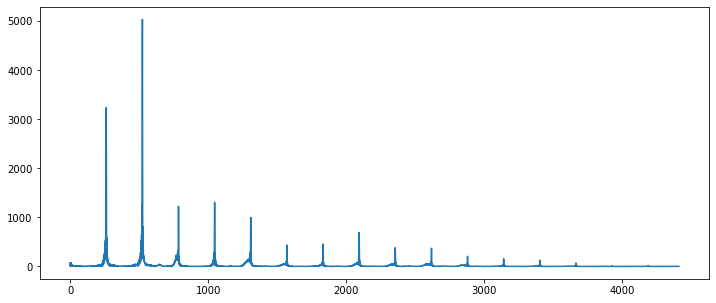

In [45]:
plot_spectrum(SAX_C4_DIR,0.1)

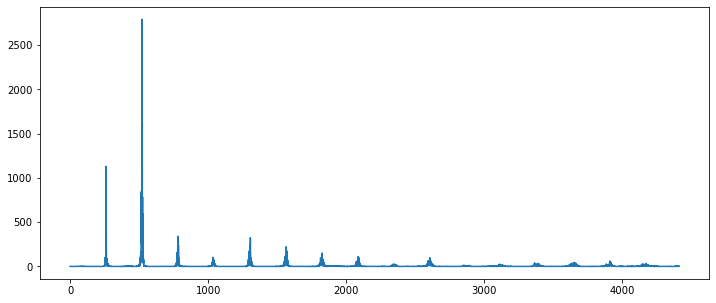

In [47]:
plot_spectrum(VIOLIN_C4, 0.1)

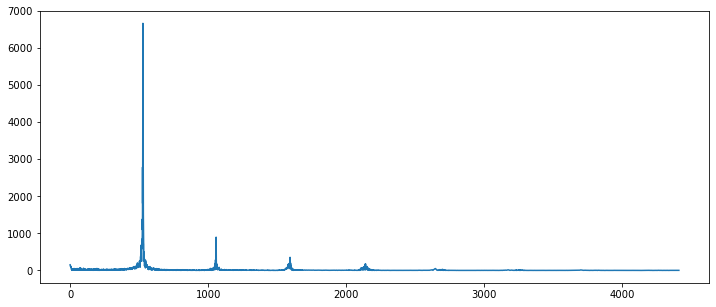

In [46]:
plot_spectrum(PIANO_C5,0.1)

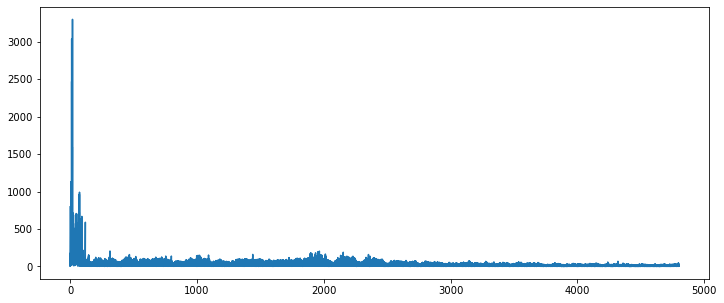

In [50]:
plot_spectrum(NOISE, 0.1)